In [21]:
import numpy as np, pandas as pd, os, sys, seaborn as sns, warnings, matplotlib.pyplot as plt, statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,4)
warnings.filterwarnings(action='ignore')
LW = 0
if LW:
    os.chdir("/Users/home/Desktop/Research/Coronavirus/Public GitHub")
%run Coronavirus_Music_Functions.ipynb

In [4]:
if LW:
    with open("/Users/home/Desktop/Research/Coronavirus/Public GitHub/factors_all_data.csv", encoding="utf8", errors='ignore') as file:
        all_data = pd.read_csv(file)
else:
    all_data = pd.read_csv('factors_all_data.csv') 
all_data.rename(columns={'Demographics_General_Gender': 'Gender'}, inplace=True)
all_data.columns = all_data.columns.str.replace(r'^.*_', '', regex=True)
all_data.shape

(5113, 239)

In [5]:
living = [c for c in all_data.columns if c.startswith('Living Situation') and 'No Response' not in c]
work = [c for c in all_data.columns if c.startswith('Ways Work Affected') and 'No Response' not in c]
covid = [c for c in all_data.columns if c.startswith('Infected with COVID') and 'No Response' not in c]
col_list = living + work + covid

all_X = all_data.loc[:,col_list]
all_X.reset_index(inplace = True, drop = True)

### **Factor 1: Negative Emotions**

In [6]:
y = all_data.loc[:,'F1']

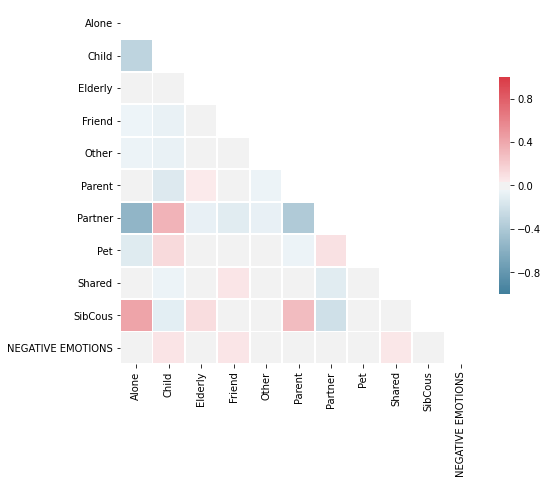

In [7]:
# living situation
data = all_X.loc[:,living]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

# NOTE from LF TODO CHECK: why is alone highly correlated with sibcous? Someone living alone should not have that.. 

In [26]:
# NOTE from LF: so we are predicting continuous factor score from binary OHE columns? Does this make sense?
# From the corrs above it's possible some predictors might need to be dropped. But we check VIFs (added a cell below) 
# We might consider checking VIFs for all. I have to say I'm still confused though we alone should be correlated highly with anything else besides maybe pet.. 

X = all_X.loc[:,living]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit(L1_wt=1, refit=True)
f1_living_r2 = avg_results.rsquared
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     39.46
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.38e-75
Time:                        22:21:31   Log-Likelihood:                -6353.4
No. Observations:                5113   AIC:                         1.273e+04
Df Residuals:                    5102   BIC:                         1.280e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3991      0.036    -11.127      0.000      -0.469      -0.329
Alone          0.5147      0.046     11.277      0.000       0.425       0.604
Child          0.4014      0.028     14.595      0.000       0.348       0.455
Elderly        0.2587      0.092      2.799      0.005       0.077       0.440
Friend         0.5809      0.093      6.257      0.000       0.399       0.763
Other         -0.2677      0.089     -3.022      0.003      -0.441      -0.094
Parent         0.2696      0.038      7.067      0.000       0.195       0.344
Partner        0.2772      0.035      7.819      0.000       0.208       0.347
Pet           -0.1482      0.029     -5.026      0.000      -0.206      -0.090
Shared        -0.0182      0.085     -0.214      0.830      -0.184       0.148
SibCous       -0.4359      0.072     -6.044      0.000      -0.577      -0.295
==============================================================================
Omnibus:                      417.464   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              737.615
Skew:                           0.587   Prob(JB):                    6.74e-161
Kurtosis:                       4.444   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,9.339082,const
1,2.382431,Alone
2,1.182721,Child
3,1.025683,Elderly
4,1.058317,Friend
5,1.049320,Other
6,1.652179,Parent
7,2.225755,Partner
8,1.037456,Pet
9,1.040411,Shared


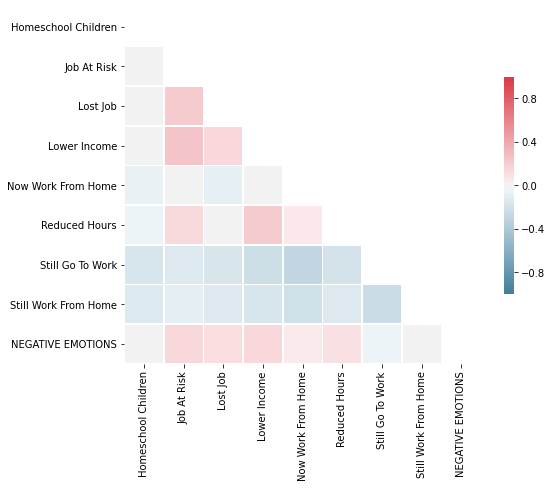

In [9]:
# work situation
data = all_X.loc[:,work]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [10]:
X = all_X.loc[:,work]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
f1_work_r2 = avg_results.rsquared
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F1   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     27.36
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           9.35e-47
Time:                        22:03:36   Log-Likelihood:                -6817.8
No. Observations:                5113   AIC:                         1.366e+04
Df Residuals:                    5104   BIC:                         1.372e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2173      0.031     -6.936      0.000      -0.279      -0.156
Homeschool Children      0.0453      0.045      1.011      0.312      -0.043       0.133
Job At Risk              0.3737      0.054      6.888      0.000       0.267       0.480
Lost Job                 0.3342      0.049      6.786      0.000       0.238       0.431
Lower Income             0.2578      0.037      6.992      0.000       0.185       0.330
Now Work From Home       0.1563      0.035      4.479      0.000       0.088       0.225
Reduced Hours            0.1862      0.039      4.777      0.000       0.110       0.263
Still Go To Work         0.1112      0.038      2.953      0.003       0.037       0.185
Still Work From Home     0.0910      0.038      2.417      0.016       0.017       0.165
==============================================================================
Omnibus:                      176.719   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.645
Skew:                          -0.410   Prob(JB):                     6.68e-47
Kurtosis:                       3.571   Cond. No.                         5.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

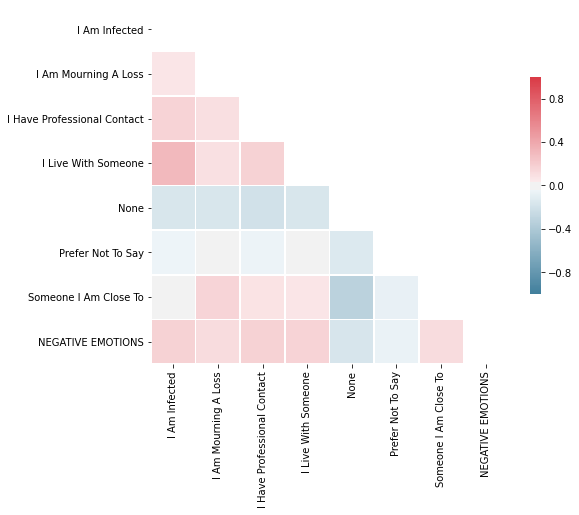

In [11]:
# contact with Covid-19
data = all_X.loc[:,covid]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [12]:
X = all_X.loc[:,covid]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
f1_covid_r2 = avg_results.rsquared
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F1   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     59.14
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           9.48e-93
Time:                        22:03:36   Log-Likelihood:                -6711.6
No. Observations:                5113   AIC:                         1.344e+04
Df Residuals:                    5105   BIC:                         1.350e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0156      0.021     -0.756      0.450      -0.056       0.025
I Am Infected                   0.5085      0.070      7.300      0.000       0.372       0.645
I Am Mourning A Loss            0.3170      0.068      4.656      0.000       0.184       0.451
I Have Professional Contact     0.4436      0.057      7.789      0.000       0.332       0.555
I Live With Someone             0.4715      0.073      6.501      0.000       0.329       0.614
None                           -0.1736      0.029     -6.092      0.000      -0.229      -0.118
Prefer Not To Say              -0.2394      0.068     -3.497      0.000      -0.374      -0.105
Someone I Am Close To           0.1602      0.040      4.034      0.000       0.082       0.238
==============================================================================
Omnibus:                      214.368   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.752
Skew:                          -0.453   Prob(JB):                     1.19e-58
Kurtosis:                       3.656   Cond. No.                         7.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Factor 3: Positive Emotions**

In [13]:
y = all_data.loc[:,'F3']

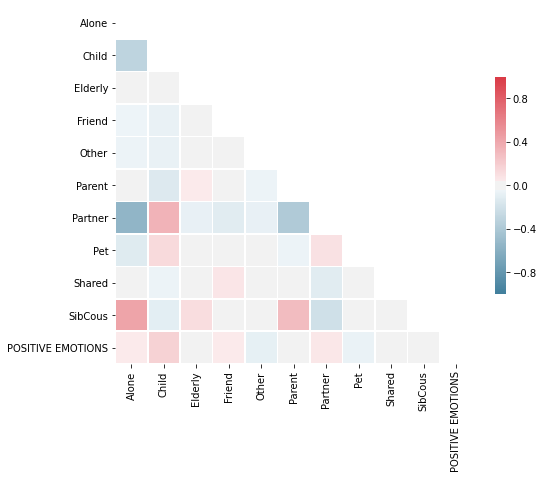

In [14]:
# living situation
data = all_X.loc[:,living]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [15]:
X = all_X.loc[:,living]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     35.88
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           8.58e-75
Time:                        22:03:37   Log-Likelihood:                -6353.4
No. Observations:                5113   AIC:                         1.273e+04
Df Residuals:                    5102   BIC:                         1.281e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3991      0.036    -11.127      0.000      -0.469      -0.329
Alone          0.5147      0.046     11.277      0.000       0.425       0.604
Child          0.4014      0.028     14.595      0.000       0.348       0.455
Elderly        0.2587      0.092      2.799      0.005       0.077       0.440
Friend         0.5809      0.093      6.257      0.000       0.399       0.763
Other         -0.2677      0.089     -3.022      0.003      -0.441      -0.094
Parent         0.2696      0.038      7.067      0.000       0.195       0.344
Partner        0.2772      0.035      7.819      0.000       0.208       0.347
Pet           -0.1482      0.029     -5.026      0.000      -0.206      -0.090
Shared        -0.0182      0.085     -0.214      0.830      -0.184       0.148
SibCous       -0.4359      0.072     -6.044      0.000      -0.577      -0.295
==============================================================================
Omnibus:                      417.464   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              737.615
Skew:                           0.587   Prob(JB):                    6.74e-161
Kurtosis:                       4.444   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

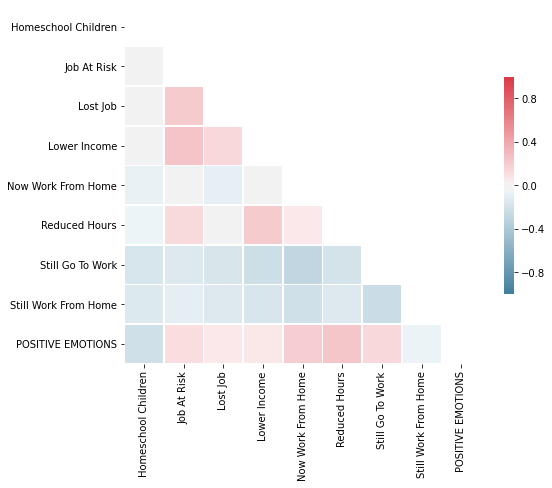

In [16]:
# work situation
data = all_X.loc[:,work]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [17]:
X = all_X.loc[:,work]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 09 Dec 2020   Prob (F-statistic):          9.16e-253
Time:                        22:03:37   Log-Likelihood:                -5943.0
No. Observations:                5113   AIC:                         1.191e+04
Df Residuals:                    5104   BIC:                         1.197e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5616      0.026    -21.265      0.000      -0.613      -0.510
Homeschool Children     -0.2432      0.038     -6.443      0.000      -0.317      -0.169
Job At Risk              0.3279      0.046      7.172      0.000       0.238       0.418
Lost Job                 0.3793      0.042      9.140      0.000       0.298       0.461
Lower Income             0.1517      0.031      4.883      0.000       0.091       0.213
Now Work From Home       0.6580      0.029     22.370      0.000       0.600       0.716
Reduced Hours            0.6845      0.033     20.833      0.000       0.620       0.749
Still Go To Work         0.6979      0.032     21.998      0.000       0.636       0.760
Still Work From Home     0.3308      0.032     10.423      0.000       0.269       0.393
==============================================================================
Omnibus:                      323.680   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              563.968
Skew:                           0.483   Prob(JB):                    3.43e-123
Kurtosis:                       4.309   Cond. No.                         5.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

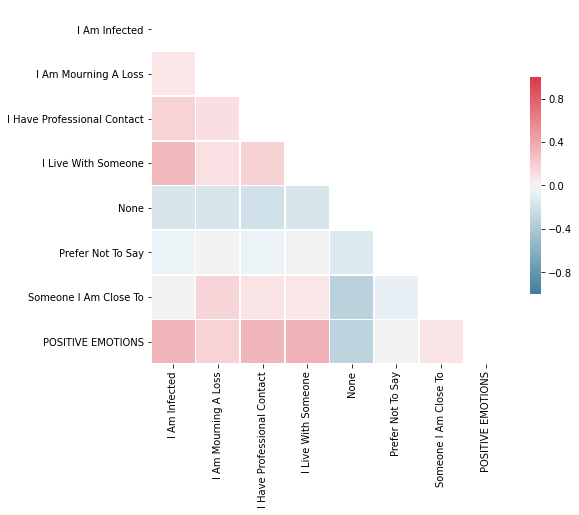

In [18]:
# contact with Covid-19
data = all_X.loc[:,covid]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [19]:
X = all_X.loc[:,covid]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     248.3
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:03:38   Log-Likelihood:                -5703.7
No. Observations:                5113   AIC:                         1.143e+04
Df Residuals:                    5105   BIC:                         1.148e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0413      0.017      2.436      0.015       0.008       0.074
I Am Infected                   0.8687      0.057     15.188      0.000       0.757       0.981
I Am Mourning A Loss            0.3981      0.056      7.120      0.000       0.288       0.508
I Have Professional Contact     0.7851      0.047     16.790      0.000       0.693       0.877
I Live With Someone             0.9822      0.060     16.494      0.000       0.865       1.099
None                           -0.3689      0.023    -15.763      0.000      -0.415      -0.323
Prefer Not To Say              -0.1559      0.056     -2.774      0.006      -0.266      -0.046
Someone I Am Close To          -0.1077      0.033     -3.303      0.001      -0.172      -0.044
==============================================================================
Omnibus:                       11.117   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.477
Skew:                          -0.014   Prob(JB):                      0.00118
Kurtosis:                       3.250   Cond. No.                         7.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""